# Customer Churn Analysis – End-to-End Pipeline
**Tools:** Python, Pandas, NumPy, Scikit-learn  
**Objective:** Identify churn drivers and predict churn probability


## IMPORTING LIBRARIES

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LOADING DATASET

In [24]:
df = pd.read_csv(r"D:\DATA ANALYST\Project Repo\Python Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.shape

(7043, 21)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## DATA CLEANING & PREPROCESSING

In [28]:
# Fix TotalCharges
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [29]:
# Handling Missing Values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

## EXPLORATORY DATA ANALYSIS (EDA)

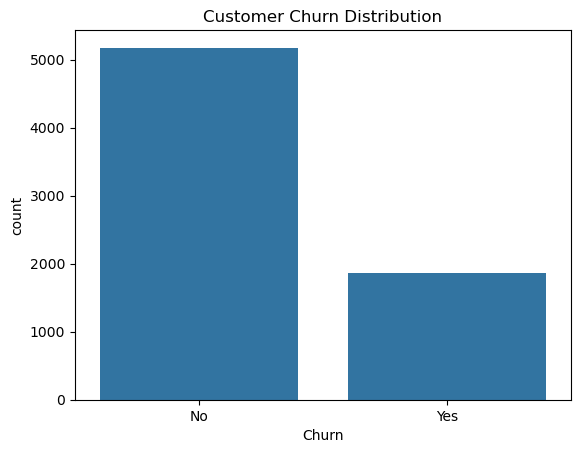

In [30]:
# Churn Distribution
sns.countplot(x='Churn',data = df)
plt.title('Customer Churn Distribution')
plt.show()

# Churn Vs Contract Type

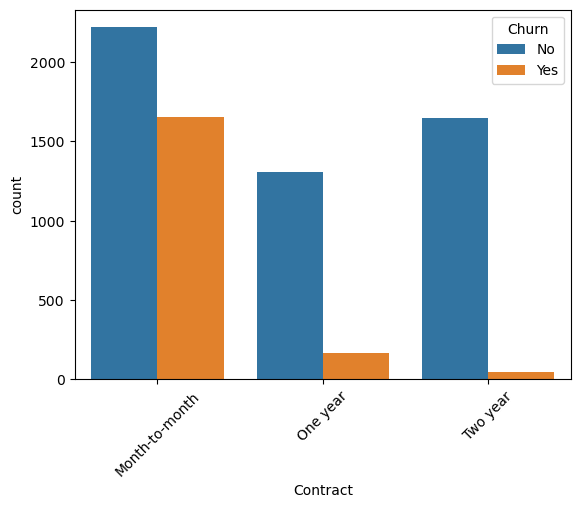

In [31]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.show()

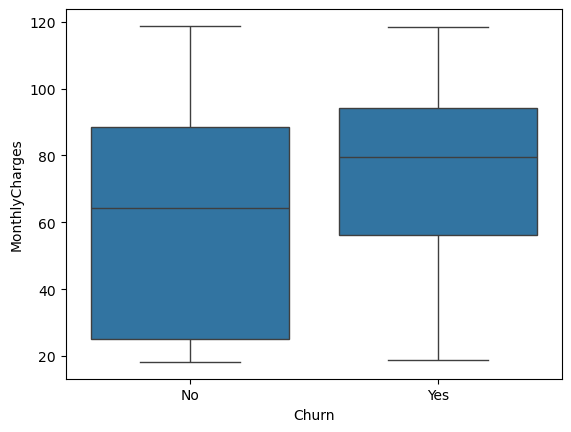

In [32]:
# Monthly Charges Vs Churn
sns.boxplot(x='Churn', y = 'MonthlyCharges', data=df)
plt.show()

## ENCODING CATEGORICAL VARIABLES

In [41]:
df_encoded = pd.get_dummies(df, drop_first=True)

## FEATURE SCALING

In [42]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Churn_Yes', axis=1)
Y = df_encoded['Churn_Yes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## TRAIN-TEST SPLIT

In [43]:
X_train , X_test , y_train , y_test=train_test_split(X,Y,test_size =0.2, random_state =42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LOGISTIC REGRESSION MODEL

In [44]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## MODEL EVALUATION 

In [37]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8133427963094393


### CONFUSION MATRIX

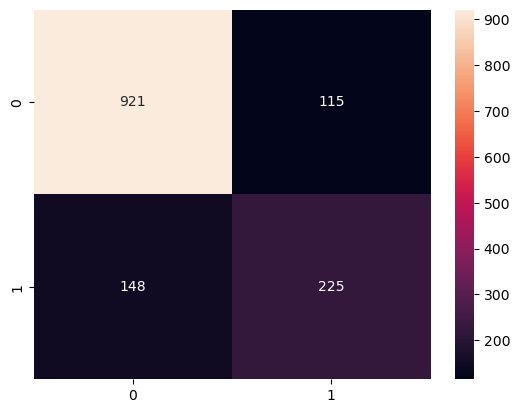

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

## CLASSIFICATION REPORT

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.86      0.89      0.88      1036
        True       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409



# IDENTIFYING TOP 3 CHURN FACTORS 

In [40]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

feature_importance.sort_values(by='Coefficient', ascending=False).head(10)


,Feature,Coefficient
7052,InternetService_Fiber optic,0.763876
7070,PaymentMethod_Electronic check,0.432840
7068,PaperlessBilling_Yes,0.379663
7065,StreamingMovies_Yes,0.285926
7051,MultipleLines_Yes,0.254593
0,SeniorCitizen,0.223494
7063,StreamingTV_Yes,0.222650
4484,customerID_6323-AYBRX,0.210660
411,customerID_0607-DAAHE,0.210402
2378,customerID_3400-ESFUW,0.209875


📊 Business Recommendations

Encourage long-term contracts via discounts

Monitor high-billing customers proactively

Improve Fiber service quality

Introduce churn-risk alerts for ops teams

Optimise pricing Strategy

